<a href="https://colab.research.google.com/github/marinaepitropaki/Time_series_analysis/blob/main/Minimum_filtering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import glob
from google.colab import drive
from google.colab import files
drive.mount('/content/drive')
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from astropy.time import Time
from astropy import time, coordinates as coord, units as u

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
def csv_reading(csv_file_path):

  """Extraction of each file in np.array"""

  float_data = []
  with open(csv_file_path, 'r') as f:
    file_to_split = f.read()
    for i, row in enumerate(file_to_split.split('\n')):
      if i ==0 or not row:
        continue
      splitted_row = row.split(',')
      float_row =[float(f) for f in  splitted_row]
      float_data. append(float_row)
      # print(float_row)
    # print(float_data)
  np_array = np.array(float_data)

  return np_array

In [ ]:
def parabola(x, a,b,c , **kwargs):
  """ Gauss equation calculation"""
  return a*x**2 + b*x + c

In [ ]:
def parabola_fit(x, y):
  """Calculation of the parabola parameters and fitting of the parabola curve
      x: data array
      Return: Dictionary with the parabola parameters
  """
  mean = sum(x * y) / sum(y)
  popt, pcov = curve_fit(parabola, x, y)
                        #  , p0=[1,1,1])
  # print(popt)
  a, b, c = popt

  parabola_dict = {
    'a' : a,
    'b' : b,
    'c':  c,
  }

  return parabola_dict

In [ ]:
def get_parabola_plotting_data(flux,
     parabola_params_dict,
     parabola_plot_points=100):
  
  """ Calculating the parabola data to plot
    flux: data array
    parabola_params_dict: parabola dictionary
    Returns: The data that will be plotted in the parabola curve
  """
  
  parabola_data_x = np.linspace(flux.min(), flux.max(), parabola_plot_points)
  parabola_data_y = parabola(parabola_data_x, **parabola_params_dict) 

  return parabola_data_x, parabola_data_y

In [ ]:
def findMin( a, b, c):
  """ Finding of the minimum point of the parabola"""
  # print( a,b,c)
  x = -b /(2*a)
  y = parabola (x, a, b, c)

  return x, y

In [ ]:
#Load CSV files of the same object from some continuous observations

main_file = '/content/drive/MyDrive/AstroPractice/photometry_nobkg_v432per_10.csv'
moved_file = '/content/drive/MyDrive/AstroPractice/v432permoved_10.csv'
binned_file = '/content/drive/MyDrive/AstroPractice/v432perbinned_10.csv'
csv_files = [moved_file, binned_file]


In [ ]:
flux_data = csv_reading(main_file)
array_data = flux_data.copy()

# Minimum Julian Day from data
jd_min = array_data[0,0]

#Normalization of the objects
array_data[:,0] = array_data[:, 0] - jd_min
array_data[:,1] = array_data[:, 1] / array_data[:, 1].max()
array_data[:,2] = array_data[:,2] / array_data[:,2].max()
array_data[:,3] = array_data[:,3] / array_data[:,3].max()
type(array_data)

numpy.ndarray

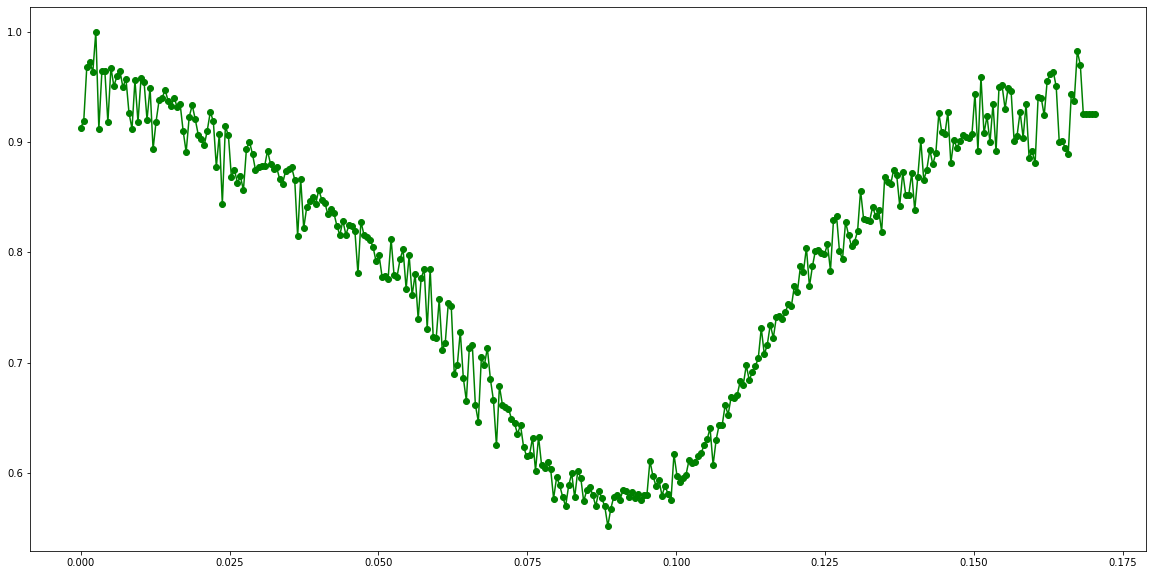

In [ ]:
#Division of the normalized main object with the comparison

star_division = np.zeros_like(array_data[:, :3])
star_division[:,0] = array_data[:,0]
star_division[:,1] = array_data[:,1] /array_data[:,2]
star_division[:,2] = array_data[:,1]/ array_data[:,3]

#Plot for comparison

fig, ax=plt.subplots(1,1,figsize=(20,10))
ax.plot(star_division[:,0], star_division[:,1], marker ='o', color ='green', label='star_division with comparison star')

min_x 0.09005310434372922 min_y 0.5742831534855204


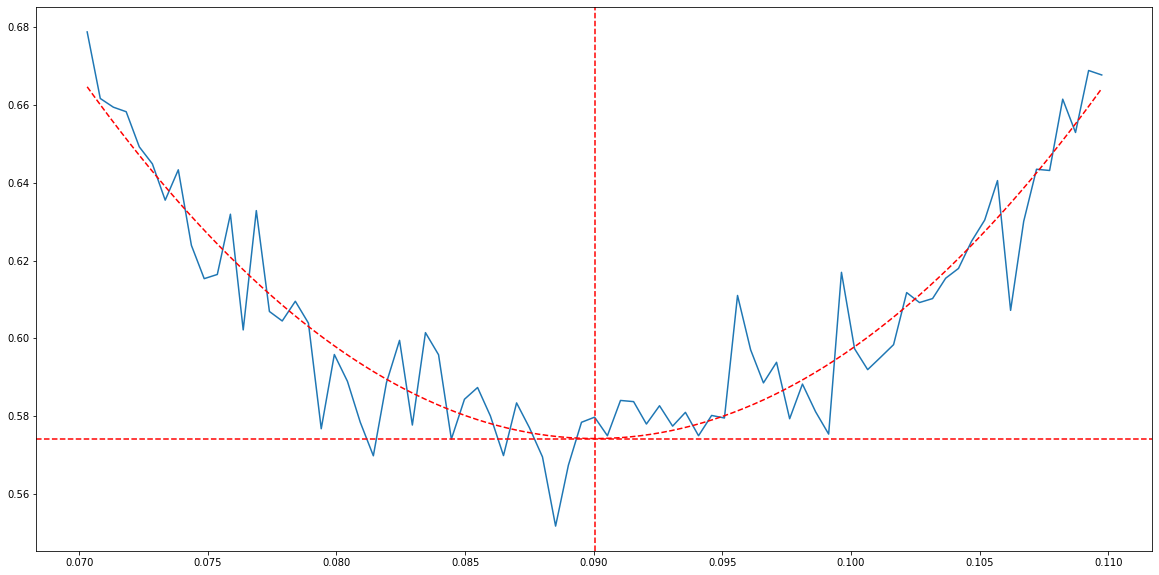

In [ ]:
#Crop of the area of the curve with the eclipse from the real data
start_fit_x = 0.07
end_fit_x = 0.11
flux_crop = star_division[(star_division[:,0] > start_fit_x) & 
                          (star_division[:,0] < end_fit_x)]

parabola_params_dict = parabola_fit(flux_crop[:,0],flux_crop[:,1])
# print(parabola_params_dict)
parabola_data_x, parabola_data_y = get_parabola_plotting_data(flux_crop[:,0],
                                                              parabola_params_dict)

realmin_x, realmin_y = findMin (**parabola_params_dict)

print('min_x',realmin_x, 'min_y',realmin_y)

#Plot of the cropped area and the paravola fitting

fig, ax= plt.subplots(1,1, figsize=(20,10))
ax.plot(flux_crop[:,0],flux_crop[:,1], label ='true cropped data')
ax.plot(parabola_data_x, parabola_data_y , '--r', label='parabola fit')
ax.axhline(realmin_y, color = 'red',linestyle ='--', label='minimum point')
ax.axvline(realmin_x, color = 'red',linestyle ='--')



min_x 0.08999803762619929 min_y 0.5747898811953887
min_x 0.08998516880267178 min_y 0.5748347868234815


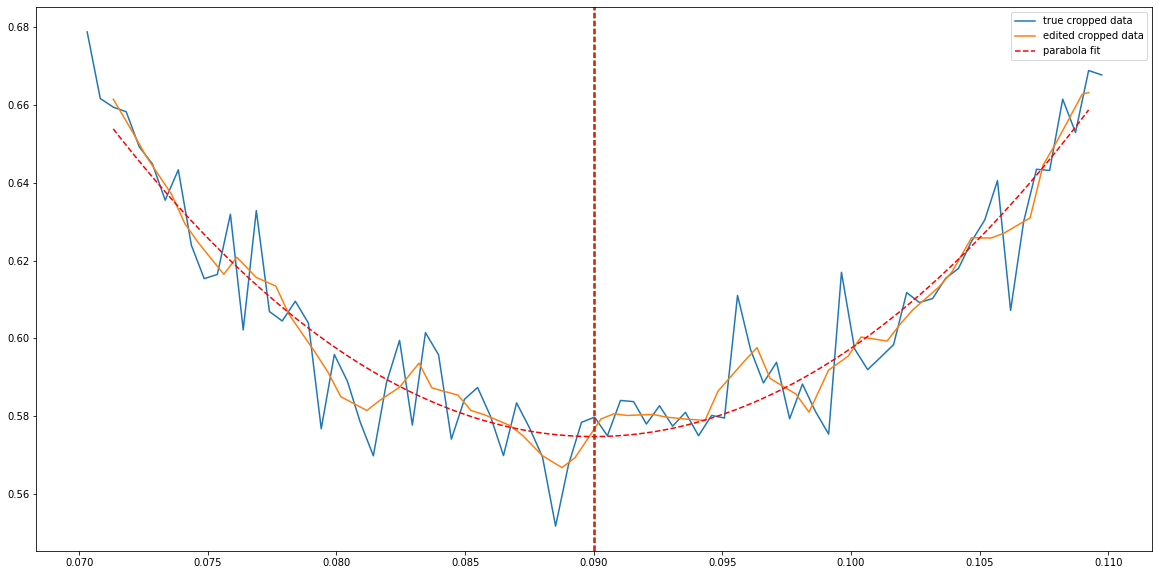

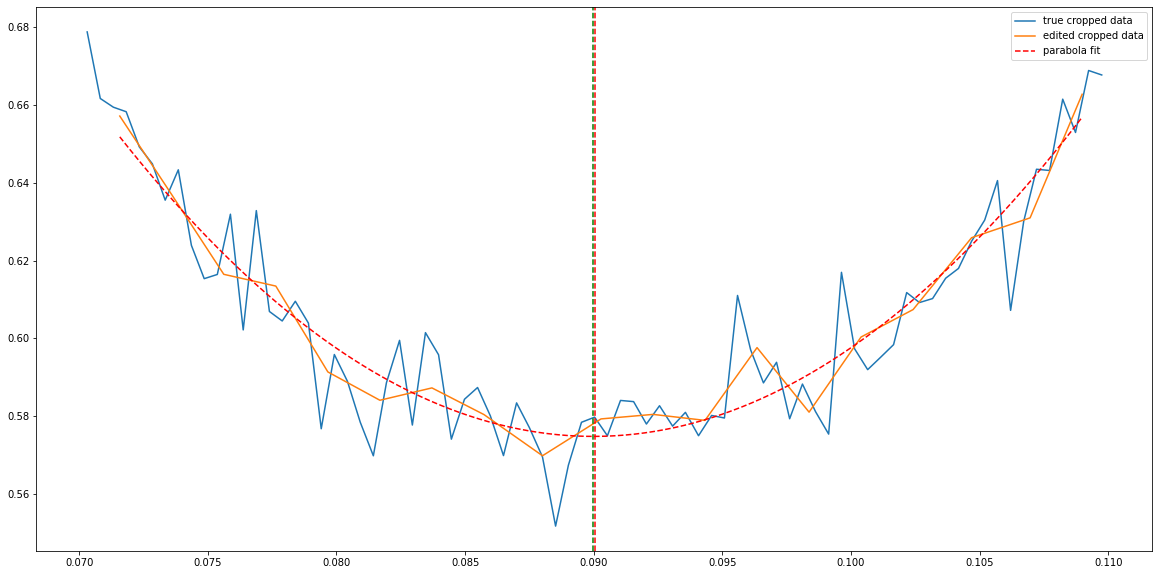

In [ ]:
#Crop of the area of the curve with the eclipse from the binned and moved average
# data

for f in csv_files:
  edited_crop = csv_reading(f)
  parabola_params_dict = parabola_fit(edited_crop[:,0],edited_crop[:,1])
  # print(parabola_params_dict)
  parabola_data_x, parabola_data_y = get_parabola_plotting_data(edited_crop[:,0],
                                                                parabola_params_dict)

  min_x, min_y = findMin (**parabola_params_dict)
  print('min_x',min_x, 'min_y',min_y)

  #Plot of the cropped area and the paravola fitting
  fig, ax= plt.subplots(1,1, figsize=(20,10))
  ax.plot(flux_crop[:,0],flux_crop[:,1], label ='true cropped data')
  ax.plot(edited_crop[:,0],edited_crop[:,1], label ='edited cropped data')
  ax.plot(parabola_data_x, parabola_data_y , '--r', label='parabola fit')
  ax.axvline(min_x, color = 'green',linestyle ='--')
  ax.axvline(realmin_x, color = 'red',linestyle ='--')

  leg = ax.legend()
  

In [ ]:
# CHECKING THE RESULTS
#result from range{0.09 to 0.15}
# print(abs(0.11778055154403605 -0.11800540588417557)*(24*60*60)) #moved
# print(abs(0.1178396008962121-0.11800540588417557)*(24*60*60)) #binned

# # results from range{0.09 to 0.149}
# print(abs(0.11838109267466022- 0.11846032920808594)*(24*60*60)) #moved
# print(abs(0.11846059832924997- 0.11846032920808594)*(24*60*60)) #binned

# # results from range{0.09 to 0.16}
# print(abs(0.11806317248935078- 0.11810759139204552)*(24*60*60)) #moved
# print(abs(0.11806704125175309- 0.11810759139204552)*(24*60*60)) #binned

# #results from the three raw data
# print(abs(0.11800540588417557-0.11846032920808594)*(24*60*60))
# print(abs(0.11800540588417557-0.11810759139204552)*(24*60*60))
# print(abs(0.11846032920808594- 0.11810759139204552)*(24*60*60))

In [ ]:
#Calculation of the value of O-C diagram

t0_min = 2448601.3693
period = 0.38330882
obs_min = 0.09005310434372922 + jd_min #the minimum from the data (realmin_x)


o_epoch = (obs_min - t0_min)/period
cal_epoch = int(o_epoch)
cal_min = t0_min + period*cal_epoch
o_c = obs_min - cal_min
print('observed epoch:', o_epoch, '\ncalculated epoch:', cal_epoch,'\nobserved_min:', obs_min, '\ncalculated min:', cal_min, '\no-c value:', o_c)

observed epoch: 27558.05264797506 
calculated epoch: 27558 
observed_min: 2459164.613941993 
calculated min: 2459164.59376156 
o-c value: 0.020180433057248592


In [ ]:
#Calculation of the Heliocentric and Barycentric Julian Day
v432per = coord.SkyCoord('3:10:10.88','+42:52:9.5', unit=(u.hourangle, u.deg), frame='icrs')
julian_days = time.Time(flux_crop[:,0]+jd_min, format='jd', location=('20.0675d', '49.5691d', '1009m')) 

# barycentric
#correction
ltt_bary = julian_days.light_travel_time(v432per)  
# print(ltt_bary) 
#calculation
time_barycentre = times.tdb + ltt_bary  

# heliocentric
#correction
ltt_helio = julian_days.light_travel_time(v432per, 'heliocentric') 
# print(ltt_helio) 
#calculation
time_heliocentre = times.utc + ltt_helio  

print('helio:', time_heliocentre, '\n bary:', time_barycentre)

In [ ]:
#heliocentric correction of the minimum point of the parabola
v432per = coord.SkyCoord('3:10:10.88','+42:52:9.5', unit=(u.hourangle, u.deg), frame='icrs')
time_min = time.Time(min_x+jd_min, format='jd', location=('20.0675d', '49.5691d', '1009m')) 

# barry
ltt_bary_min = times.light_travel_time(v432per)  
# print(ltt_bary_min) 

# helio
ltt_helio_min = times.light_travel_time(v432per, 'heliocentric') 
# print(ltt_helio_min) 